In [5]:

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Load Dataset
file_path = "Cleaned_College_Event_Dataset.csv"   # change if needed
df = pd.read_csv(file_path)

In [3]:
# 2. Dataset Overview
# ============================================
print("Shape of dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Info:\n")
print(df.info())
print("\nStatistical Summary:\n", df.describe(include="all"))


Shape of dataset: (6288, 12)

Missing Values:
 EventID            0
EventName          0
EventType          0
Department         0
DayOfWeek          0
Season             0
TimeOfDay          0
VenueCapacity      0
Attendance         0
AttendanceLevel    0
FeedbackScore      0
EngagementIndex    0
dtype: int64

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6288 entries, 0 to 6287
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EventID          6288 non-null   int64  
 1   EventName        6288 non-null   object 
 2   EventType        6288 non-null   object 
 3   Department       6288 non-null   object 
 4   DayOfWeek        6288 non-null   object 
 5   Season           6288 non-null   object 
 6   TimeOfDay        6288 non-null   object 
 7   VenueCapacity    6288 non-null   int64  
 8   Attendance       6288 non-null   int64  
 9   AttendanceLevel  6288 non-null   object 
 10  FeedbackSc

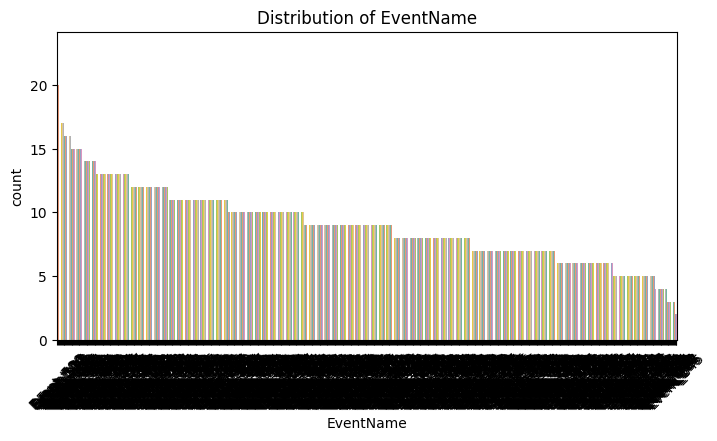

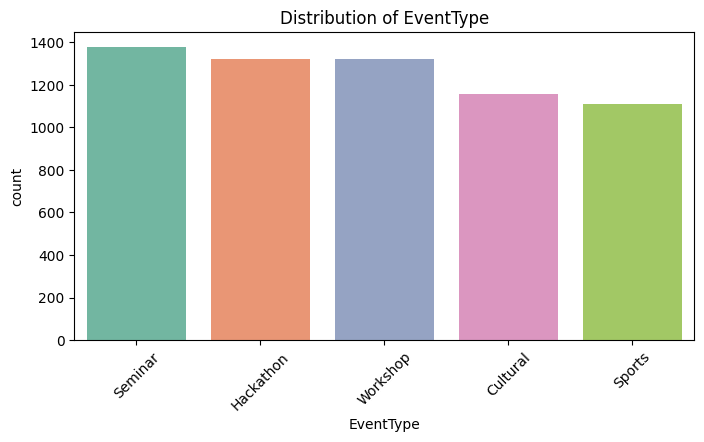

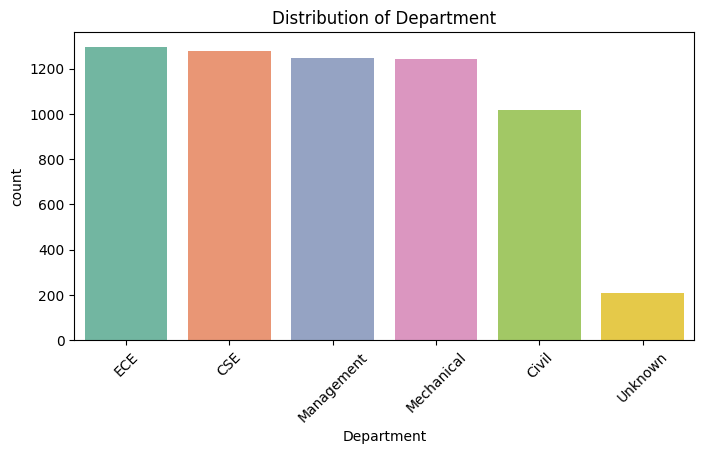

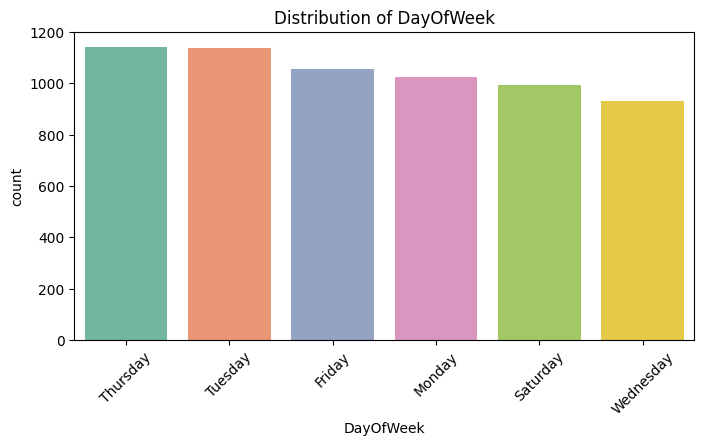

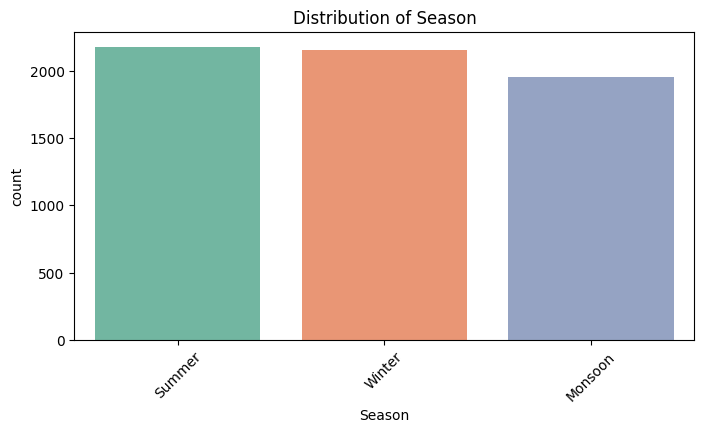

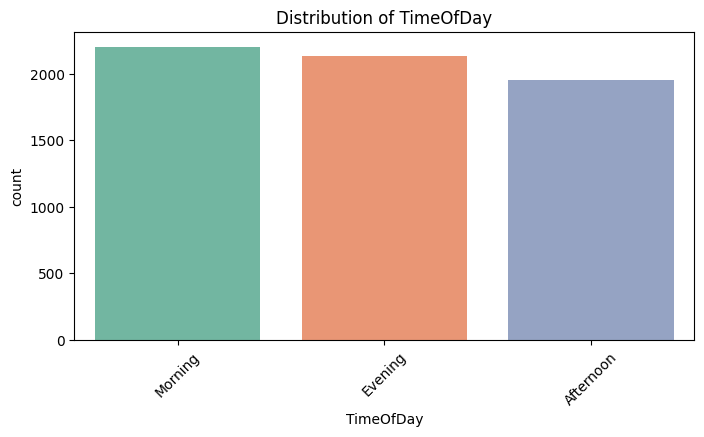

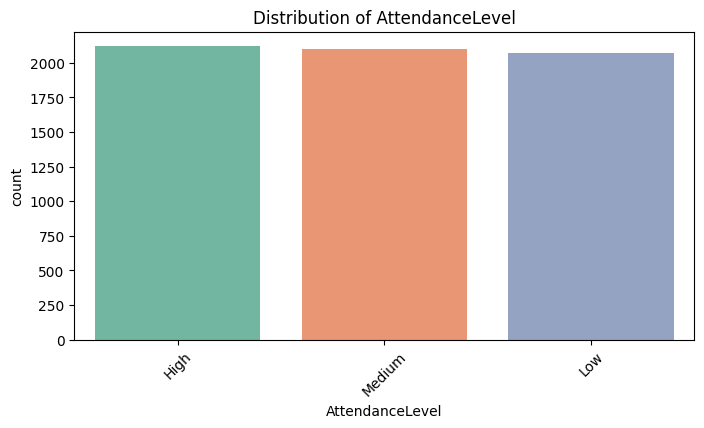

In [6]:
# 3. Categorical Variable Distributions
# ============================================
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


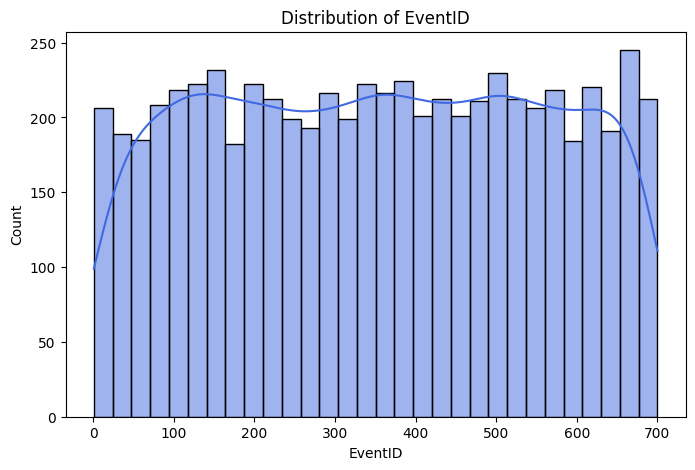

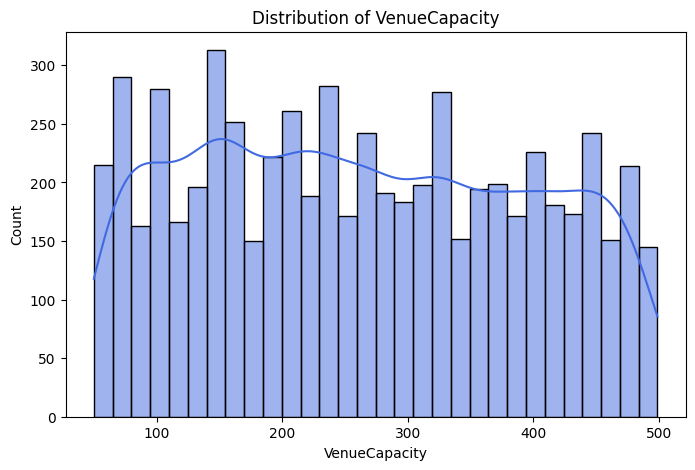

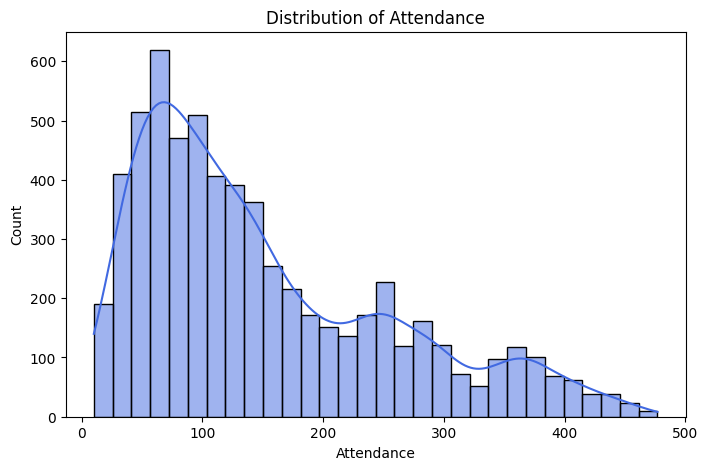

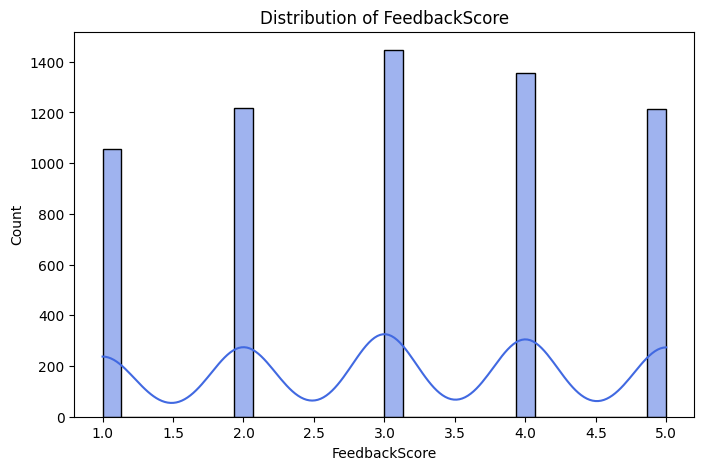

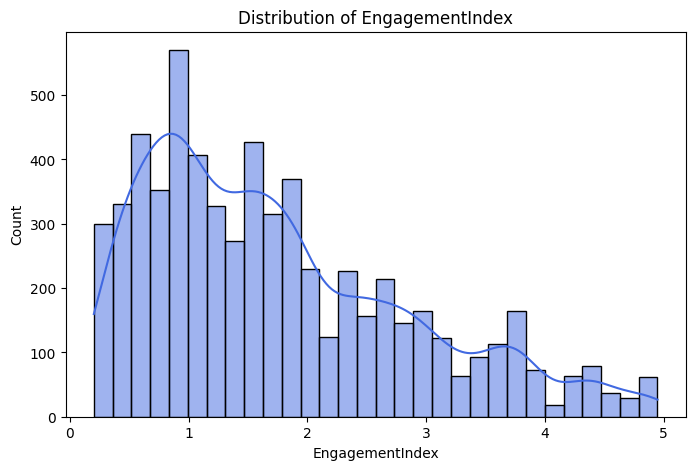

In [9]:

# 4. Numerical Variable Distributions

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.show()




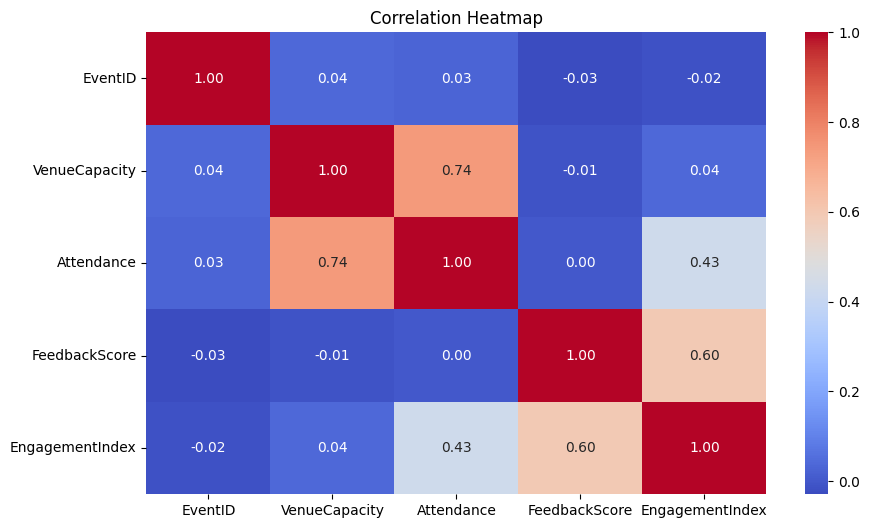

In [10]:
# ============================================
# 5. Correlation & Heatmap
# ============================================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

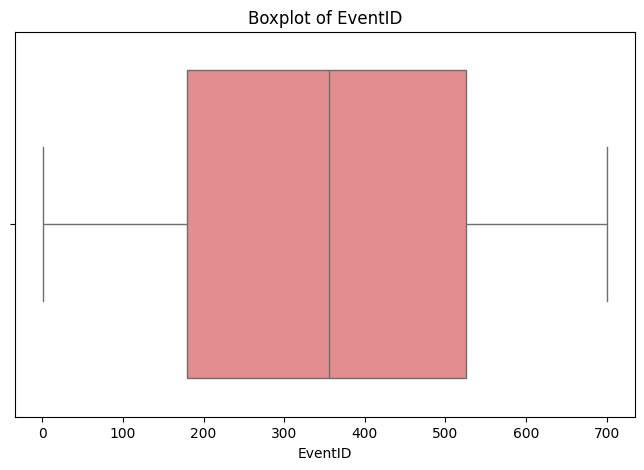

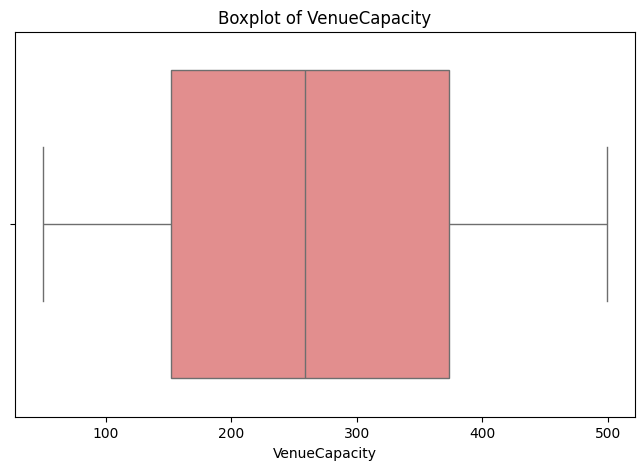

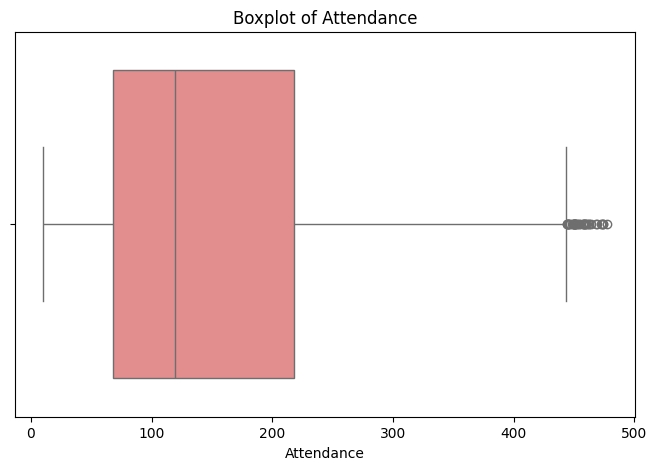

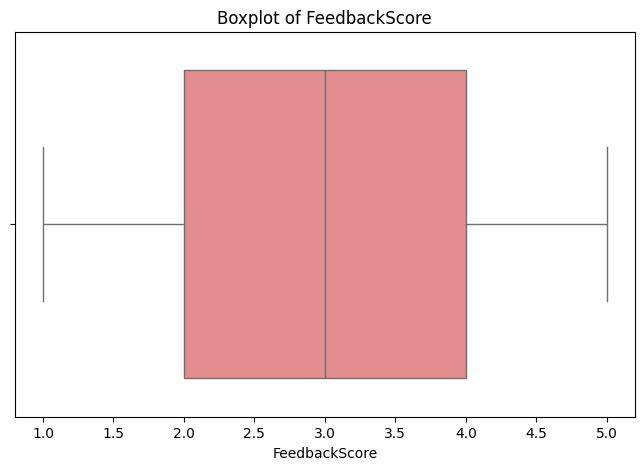

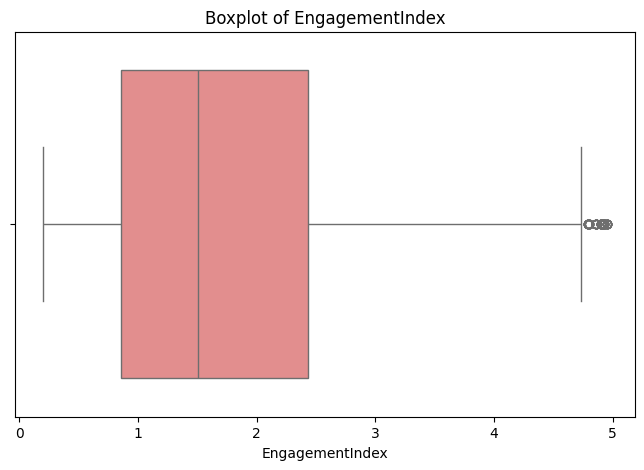

In [11]:
# ============================================
# 6. Outlier Detection with Boxplots
# ============================================
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
    plt.show()

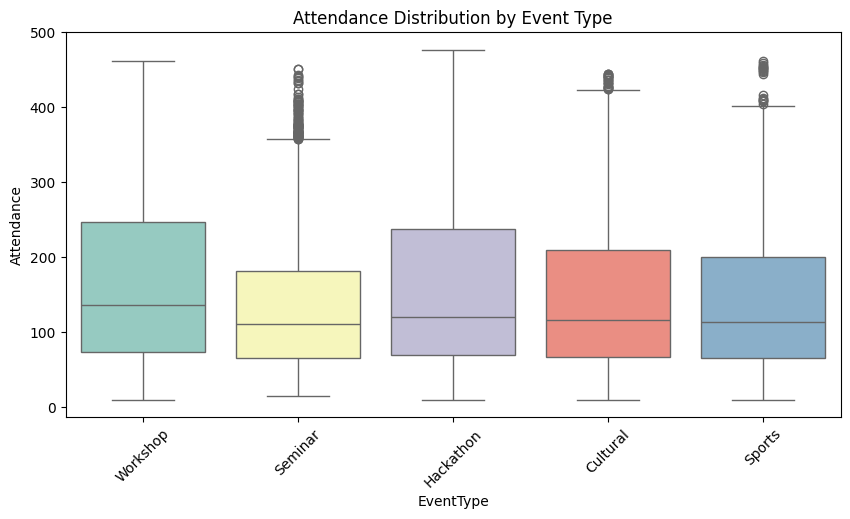

In [12]:
# 7. Advanced Insights
# ============================================

# Attendance vs EventType
plt.figure(figsize=(10,5))
sns.boxplot(x="EventType", y="Attendance", data=df, palette="Set3")
plt.title("Attendance Distribution by Event Type")
plt.xticks(rotation=45)
plt.show()




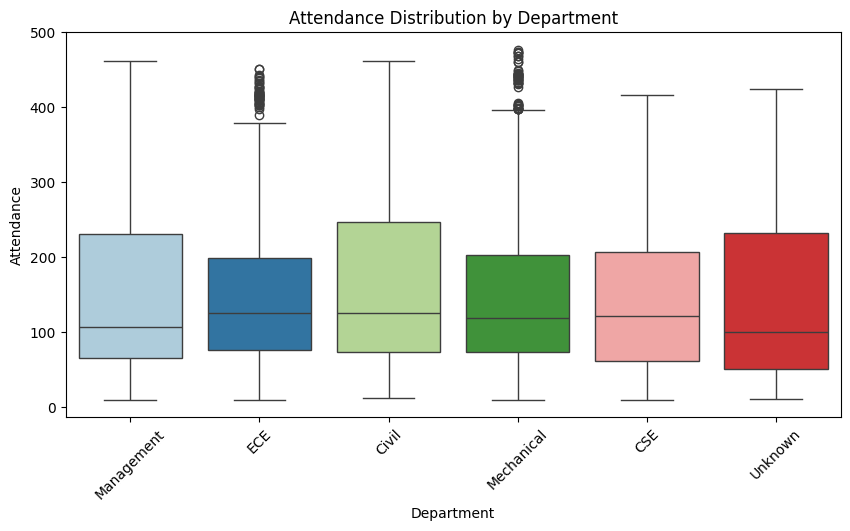

In [13]:
# Attendance vs Department
plt.figure(figsize=(10,5))
sns.boxplot(x="Department", y="Attendance", data=df, palette="Paired")
plt.title("Attendance Distribution by Department")
plt.xticks(rotation=45)
plt.show()

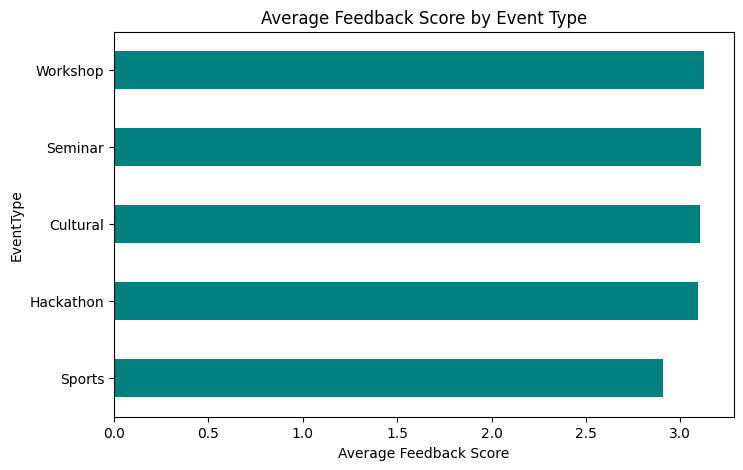

In [14]:
# Average Feedback by EventType
avg_feedback = df.groupby("EventType")["FeedbackScore"].mean().sort_values()
plt.figure(figsize=(8,5))
avg_feedback.plot(kind="barh", color="teal")
plt.title("Average Feedback Score by Event Type")
plt.xlabel("Average Feedback Score")
plt.show()

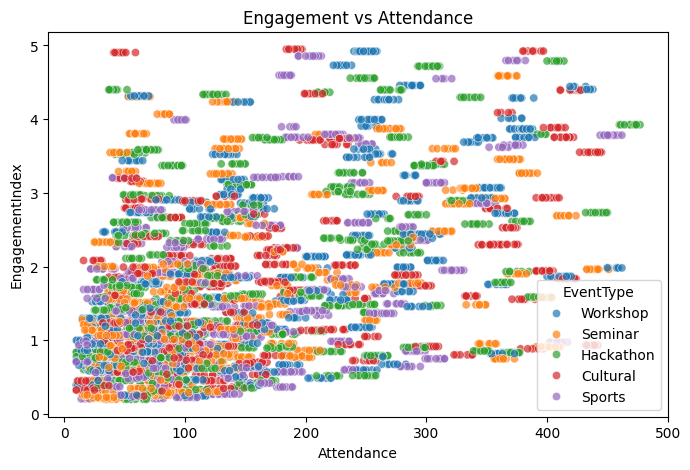

In [15]:
# Engagement vs Attendance
plt.figure(figsize=(8,5))
sns.scatterplot(x="Attendance", y="EngagementIndex", hue="EventType", data=df, alpha=0.7)
plt.title("Engagement vs Attendance")
plt.show()


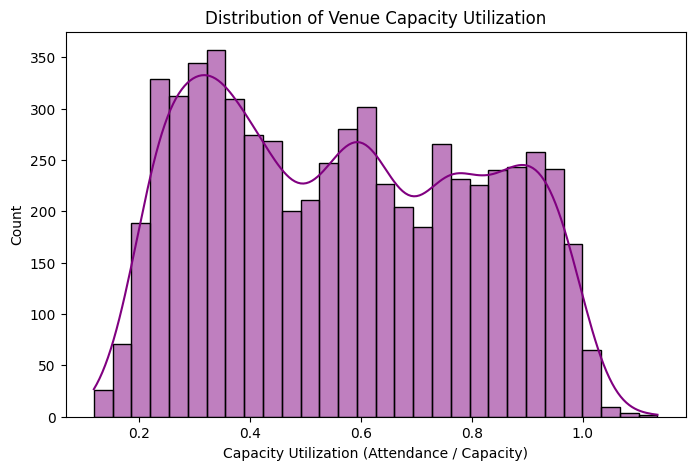

In [16]:
# Venue Capacity Utilization
df["CapacityUtilization"] = df["Attendance"] / df["VenueCapacity"]
plt.figure(figsize=(8,5))
sns.histplot(df["CapacityUtilization"], bins=30, kde=True, color="purple")
plt.title("Distribution of Venue Capacity Utilization")
plt.xlabel("Capacity Utilization (Attendance / Capacity)")
plt.show()

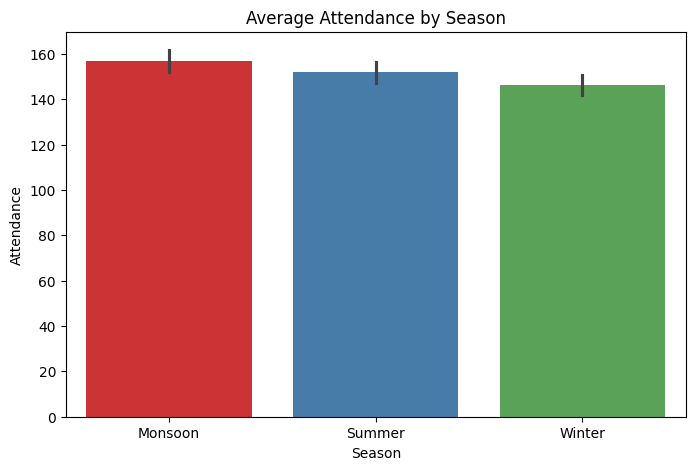

In [17]:
# Seasonality: Events by Season & Attendance
plt.figure(figsize=(8,5))
sns.barplot(x="Season", y="Attendance", data=df, estimator="mean", palette="Set1")
plt.title("Average Attendance by Season")
plt.show()

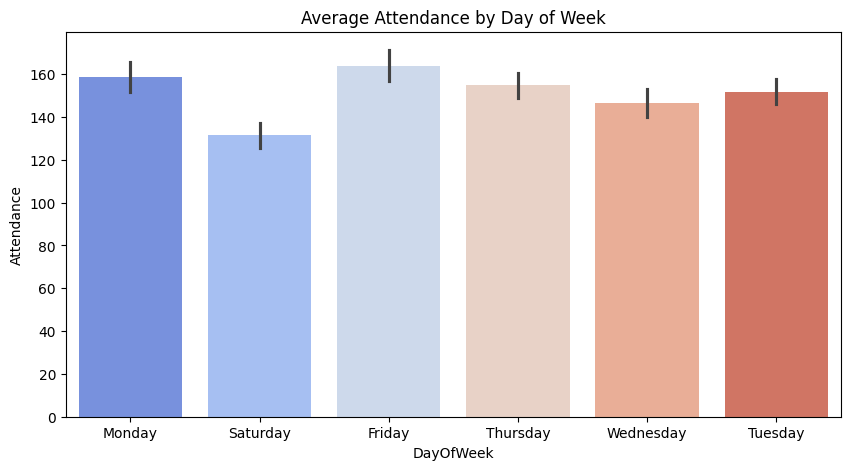

In [18]:

# Day of Week vs Attendance
plt.figure(figsize=(10,5))
sns.barplot(x="DayOfWeek", y="Attendance", data=df, estimator="mean", palette="coolwarm")
plt.title("Average Attendance by Day of Week")
plt.show()

In [19]:
# 8. Key Statistical Insights
# ============================================
print("\n🔑 Key Insights:")
print(f"- Highest attended event: {df.loc[df['Attendance'].idxmax(), 'EventName']} with {df['Attendance'].max()} attendees.")
print(f"- Lowest attended event: {df.loc[df['Attendance'].idxmin(), 'EventName']} with {df['Attendance'].min()} attendees.")
print("- Event Type with highest average feedback:\n", df.groupby("EventType")["FeedbackScore"].mean().idxmax())
print("- Department with highest average engagement:\n", df.groupby("Department")["EngagementIndex"].mean().idxmax())
print("- Average Capacity Utilization:", round(df["CapacityUtilization"].mean()*100, 2), "%")



🔑 Key Insights:
- Highest attended event: Event_382 with 477 attendees.
- Lowest attended event: Event_583 with 10 attendees.
- Event Type with highest average feedback:
 Workshop
- Department with highest average engagement:
 ECE
- Average Capacity Utilization: 56.8 %
